# 이커머스 고객 행동 분석을 통한 이탈 요인 분석 및 예측

### 프로젝트 개요
- **분석 목표** : 이커머스 시장에서 고객들의 행동과 패턴을 분석하고 세분화하여 이탈 요인을 파악한 후 대응 전략과 그에 따른 이탈율 예측 모델 생성

  > 이탈 예방 포커스 - 어떠한 이유로 고객이 이탈하는지 파악  
  >이탈율과 관련이 있는 컬럼을 찾고 그것을 회귀 예측에 사용

## IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATALOAD

In [2]:
data=pd.read_csv("data/output.csv")

데이터 출처 : https://www.kaggle.com/datasets/ermismbatuhan/digital-marketing-ecommerce-customer-behavior/data

## DATA INFO

### 컬럼 정보  

AccountLength : 사용자 계정의 사용 기간 (개월 수)  
LocationCode : 사용자가 속한 지역 코드  
UserID : 사용자의 고유 식별자  
CreditCardInfoSave : 사용자가 신용카드 정보를 저장했는지 여부  
PushStatus : 푸시 알림 활성화 여부  
AddToWishlist : 관심 목록에 추가된 제품 수  
DesktopSessions : 데스크톱에서의 세션 수  
AppSessions : 앱에서의 세션 수  
DesktopTransactions : 데스크톱에서의 구매 건수  
TotalProductDetailViews : 총 제품 상세 조회 수  
SessionDuration : 각 세션의 평균 지속 시간  
PromotionClicks : 프로모션 클릭 수  
AvgOrderValue : 평균 주문 금액  
SaleProductViews : 세일 중인 제품 조회 수  
DiscountRatePerVisitedProducts : 방문한 제품 대비 평균 할인율  
ProductDetailViewPerAppSession : 앱 세션당 제품 상세 조회 수  
AppTransactions : 앱을 통한 구매 건수  
AddToCartPerSession : 세션당 장바구니에 추가된 횟수  
CustomerServiceCalls : 고객 서비스에 연락한 횟수  
Churn : 고객의 서비스 이탈 여부 (1: 이탈, 0: 유지)  


### 컬럼 보며 가설 수립
- 개인적인 이탈율 요인 top 3 예상
  > 관심 저하, 광고 부족 , 불만족

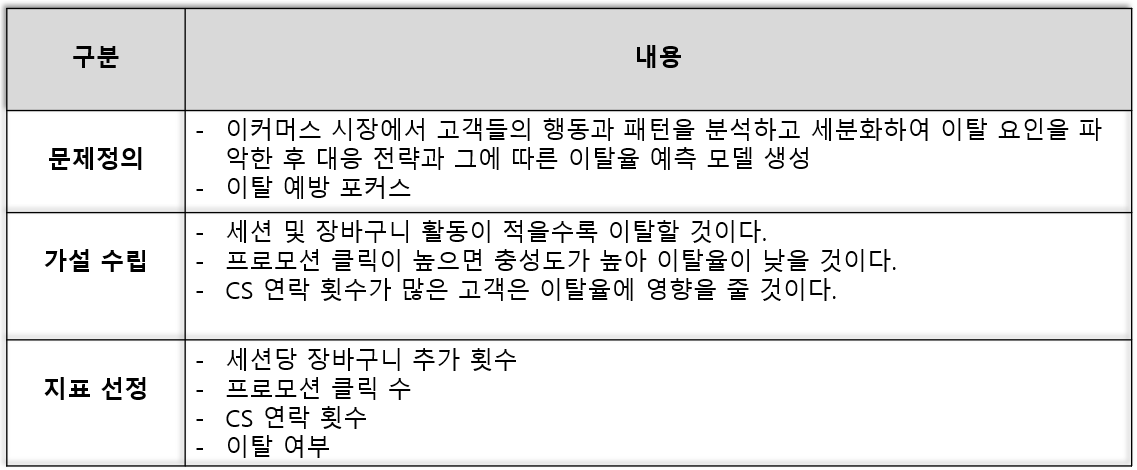

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,139.2,137,6.26,5.0,10,1.35,2,0


In [5]:
data.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3333 non-null   int64  
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

### - 중복 데이터 확인

In [7]:
data.duplicated().sum()

0

### - 결측치 확인

In [8]:
data.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

### - y값 분포 확인

In [9]:
data['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

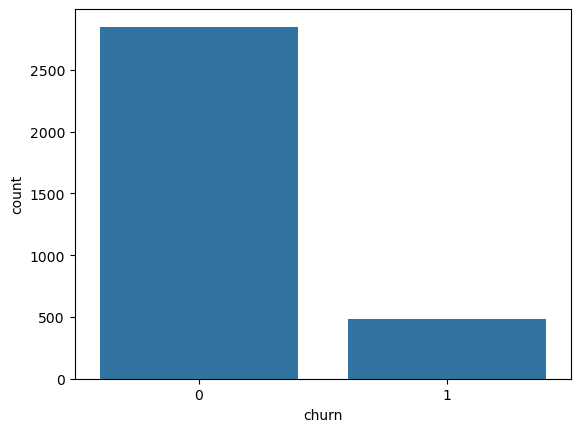

In [10]:
sns.countplot(x =data['churn'], data=data)

데이터 불균형 유의

***

## EDA

### 시각화 함수 정리

In [11]:
import scipy

# 숫자형 변수 분석
def eda_int(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(data = data, x= var, hue = hue_var)
        plt.grid()
    
        plt.subplot(1,2,2)
        sns.kdeplot(data = data, x = var, hue = hue_var, multiple='fill')
        plt.axhline(data[hue_var].mean(), color='r')
        plt.show()


# 범주형 변수 분석
def eda_cat(data, var):
    # 데이터 개수와 비율 계산
    cnt = data[var].value_counts()
    prop = data[var].value_counts() / data.shape[0]
    result = pd.DataFrame({'Count': cnt, 'Proportion': prop})
    display(result)
    
    # 플롯 생성
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=var, data=data)
    plt.title(f'{var} Distribution', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 수치 표기
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()


    
# 산점도 시각화
def eda_scat(data, target, var, hue='', churn_col='churn'):

    plt.figure(figsize = (8,8))
    
    # 이탈한 사람을 빨간색으로 표시
    if churn_col in data.columns:
        data['color'] = data[churn_col].apply(lambda x: 'red' if x == 1 else 'blue')  # 1이 이탈한 사람으로 가정

    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data, palette='coolwarm', hue = 'color')
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()


import pandas as pd
import statsmodels.api as sm

def log_reg_anal(data, independent_vars, dependent_var):
    X = data[independent_vars]
    y = data[dependent_var]

    X = sm.add_constant(X)
    
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    print(result.summary())
    const_pvalue = result.pvalues.iloc[0]  # iloc로 const의 p-value 접근
    print(f"const는 이탈율에 유의미한 영향을 미칩니다 (p-value: {const_pvalue:.4f})" if const_pvalue < 0.05 else f"const는 이탈율에 유의미한 영향을 미치지 않습니다 (p-value: {const_pvalue:.4f})")
    
    for var, p_val in zip(independent_vars, result.pvalues.iloc[1:]):  # 첫 번째 값은 const라서 1부터 시작
        if p_val < 0.05:
            print(f"{var}는 이탈율에 유의미한 영향을 미칩니다 (p-value: {p_val:.4f})")
        else:
            print(f"{var}는 이탈율에 유의미한 영향을 미치지 않습니다 (p-value: {p_val:.4f})")


### - 단변량 분석

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0


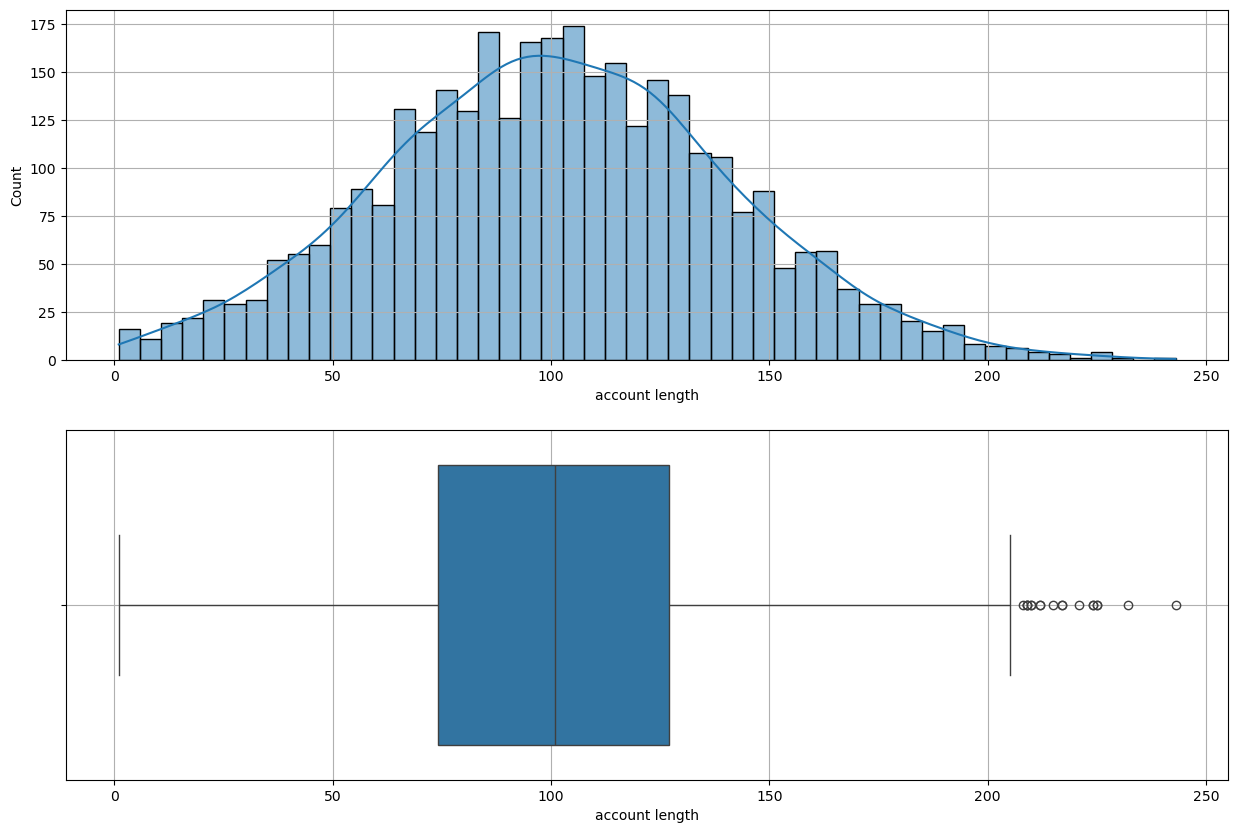

,count,mean,std,min,25%,50%,75%,max
desktop transactions,3333.0,17.087609,4.323795,0.0,14.0,17.0,20.0,31.0


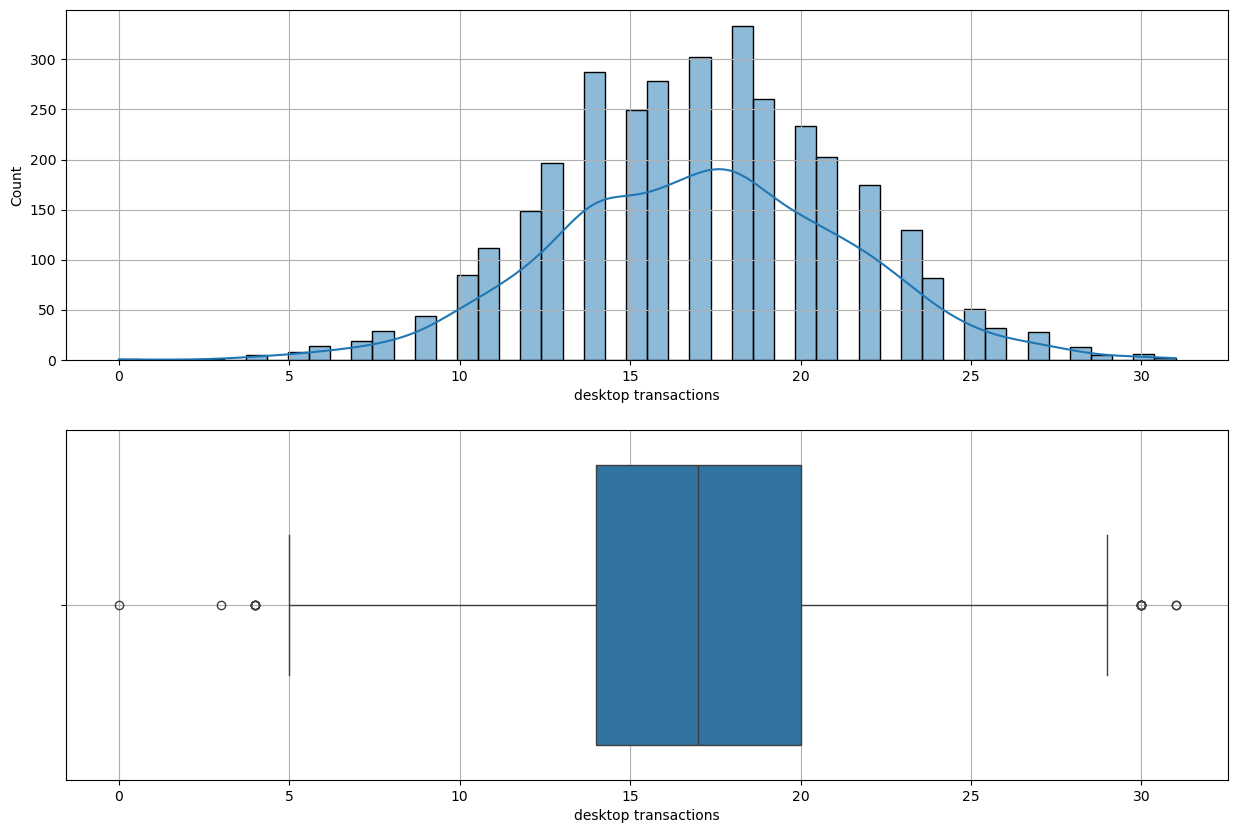

,count,mean,std,min,25%,50%,75%,max
app transactions,3333.0,4.479448,2.461214,0.0,3.0,4.0,6.0,20.0


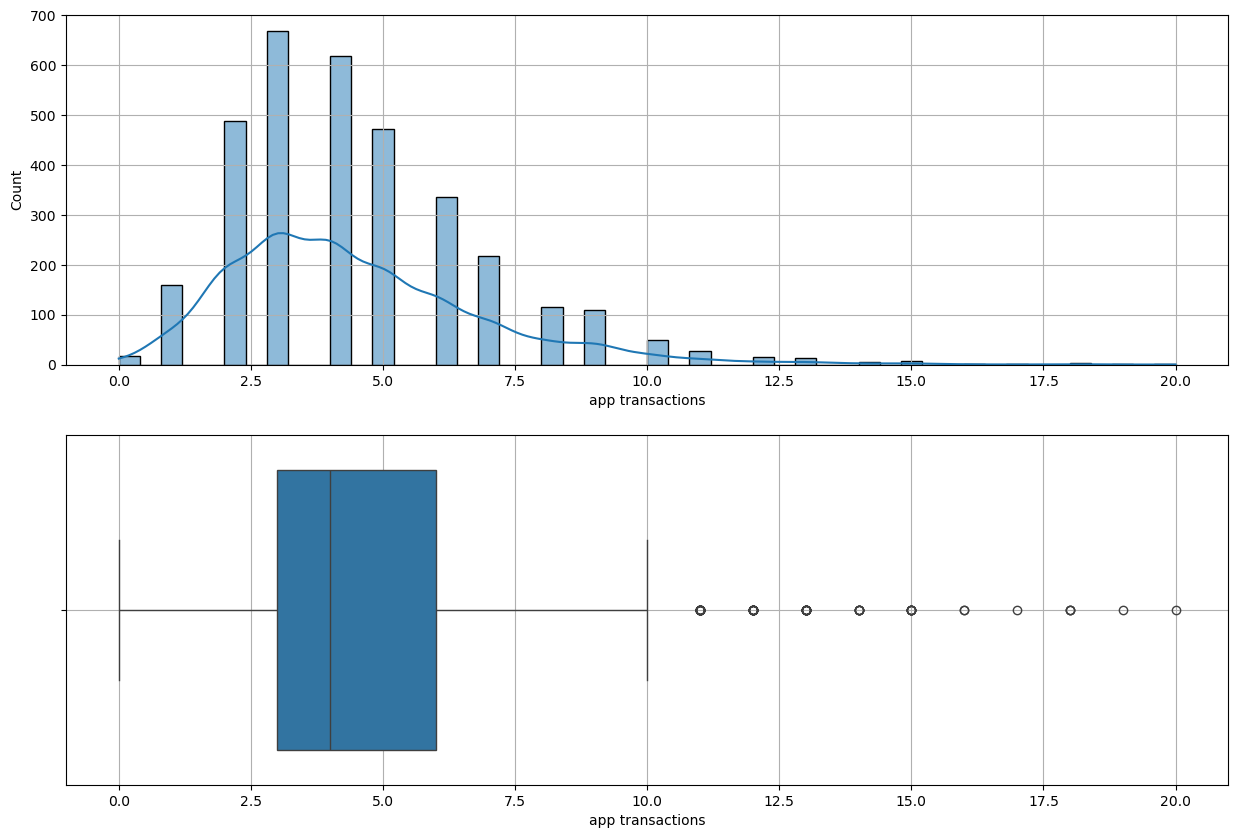

,count,mean,std,min,25%,50%,75%,max
session duration,3333.0,201.039604,50.714359,0.0,167.0,201.0,235.0,364.0


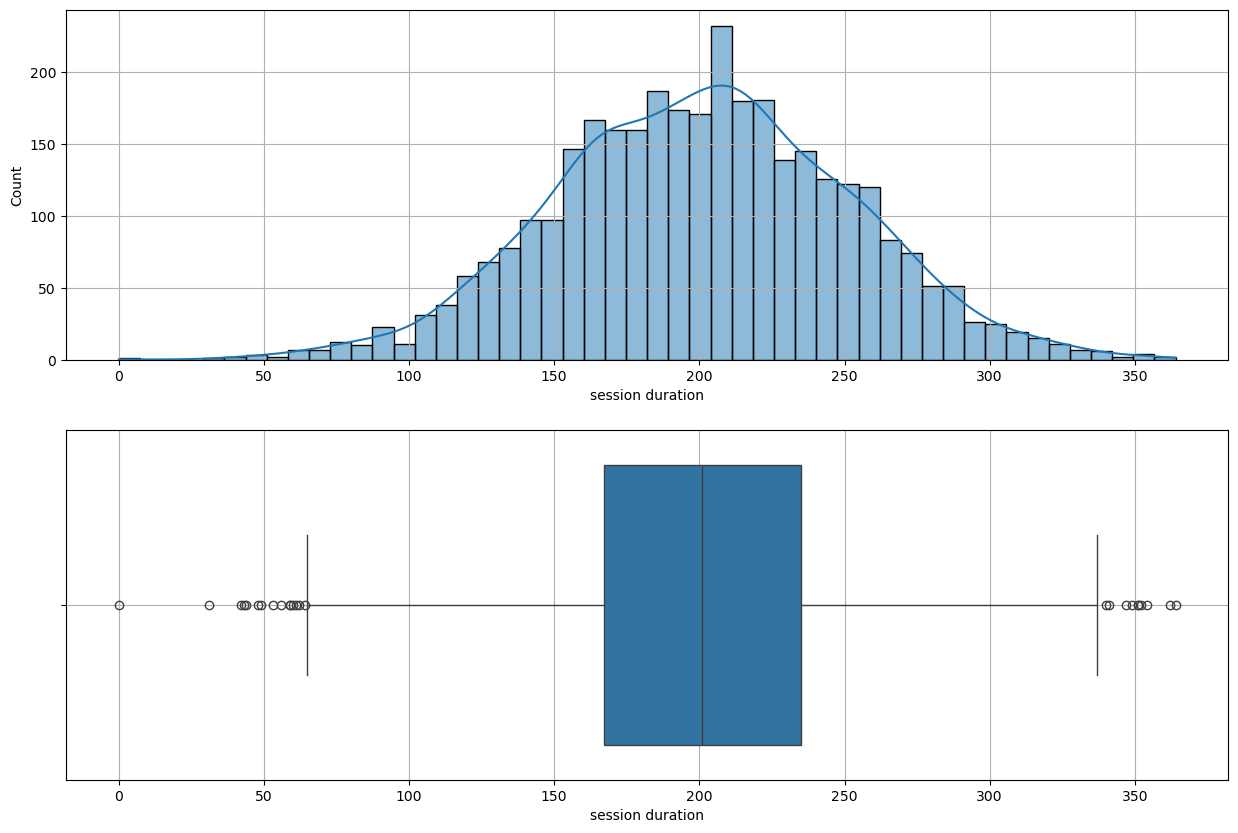

,count,mean,std,min,25%,50%,75%,max
promotion clicks,3333.0,100.110711,19.923911,0.0,87.0,100.0,114.0,170.0


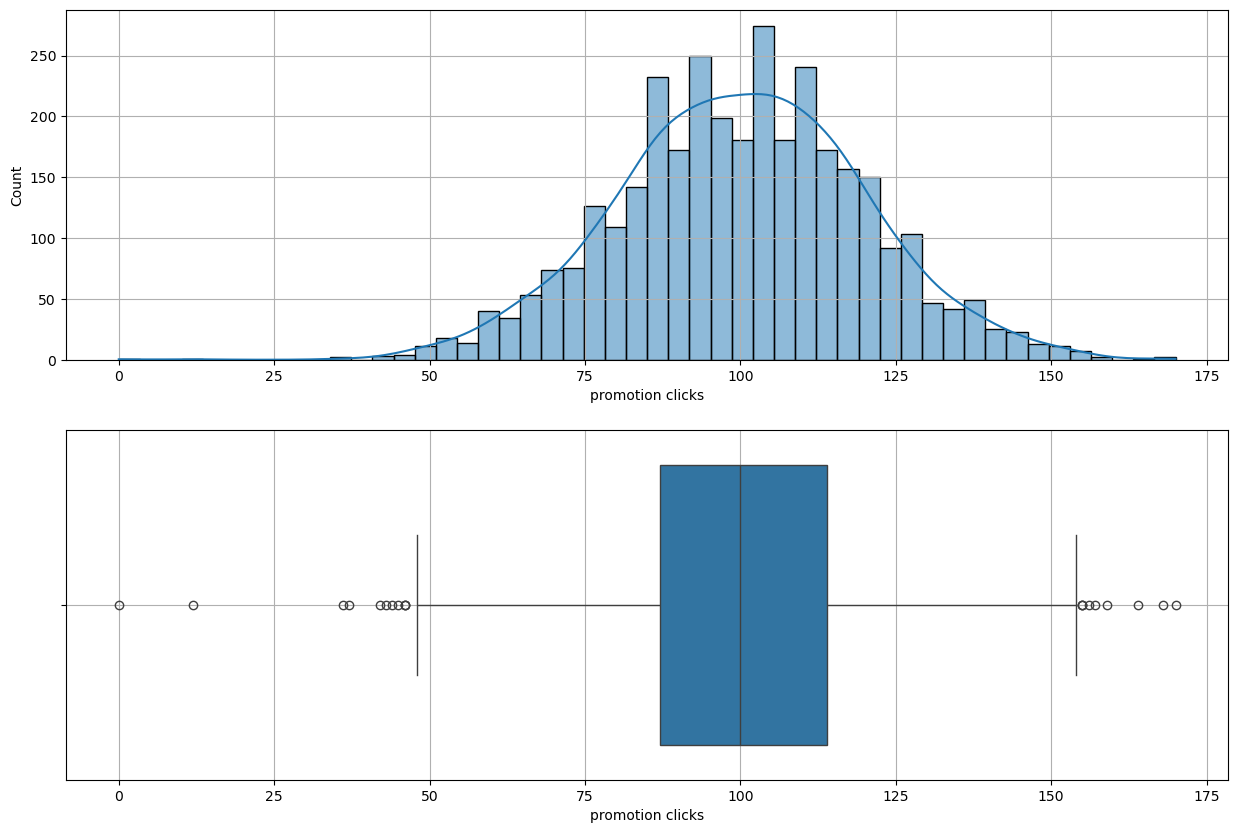

,count,mean,std,min,25%,50%,75%,max
add to cart per session,3333.0,2.764581,0.753773,0.0,2.3,2.78,3.27,5.4


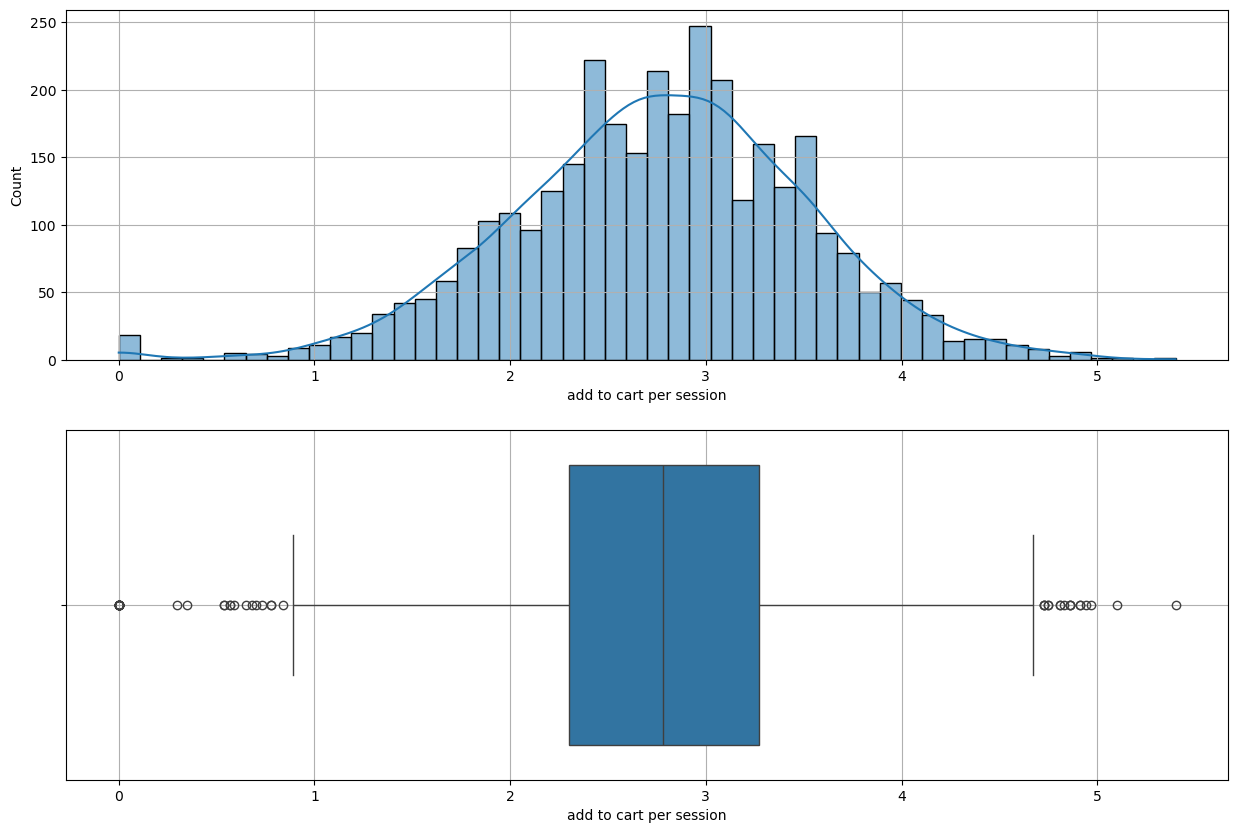

,count,mean,std,min,25%,50%,75%,max
customer service calls,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0


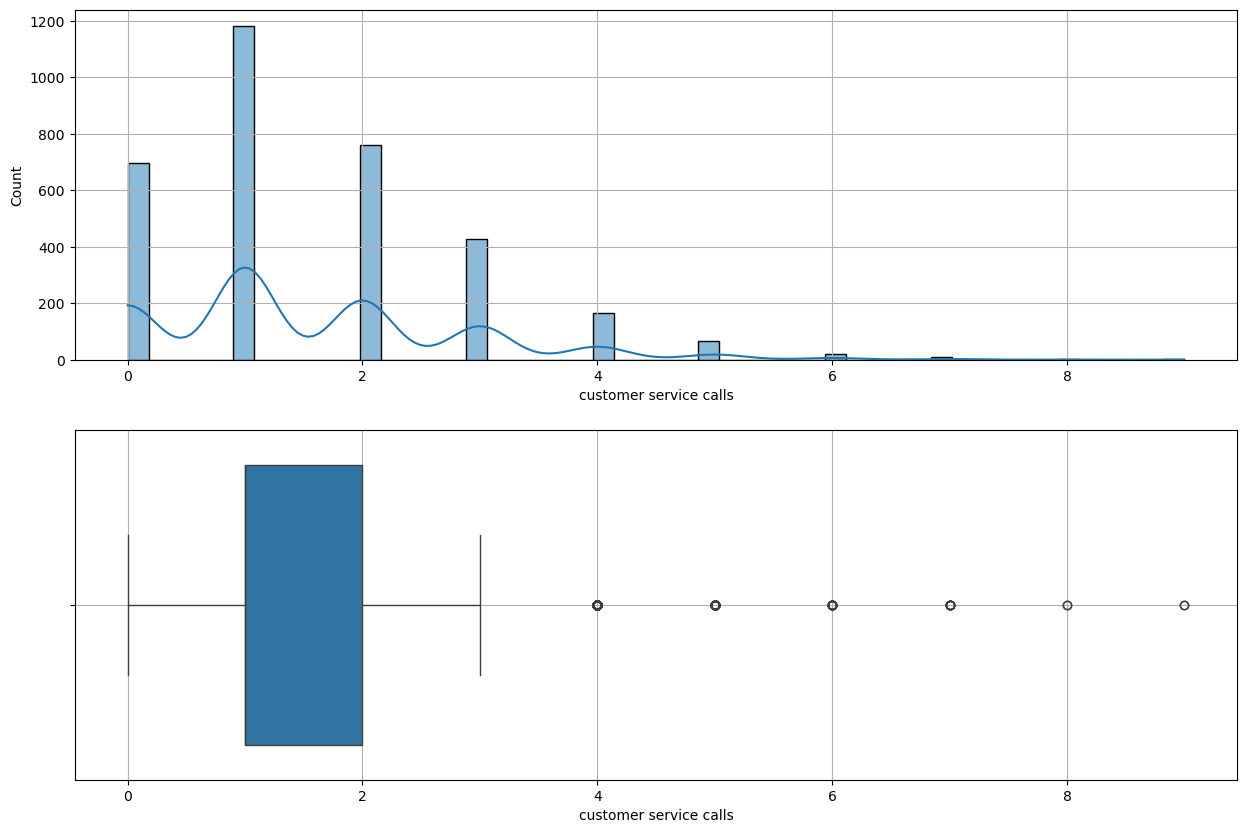

In [12]:
# 수치형 단변량 분석
eda_int(data, 'account length')
eda_int(data, 'desktop transactions')
eda_int(data, 'app transactions')
eda_int(data, 'session duration')
eda_int(data, 'promotion clicks')
eda_int(data, 'add to cart per session')
eda_int(data, 'customer service calls')

- 대부분 정규 분포를 따름
- 구매 건수는 앱보다 데스크 탑이 더 높다
- 고객 서비스에 연락한 비율은 대략 80%이다.

,Count,Proportion
credit card info save,,
no,3010,0.90309
yes,323,0.09691


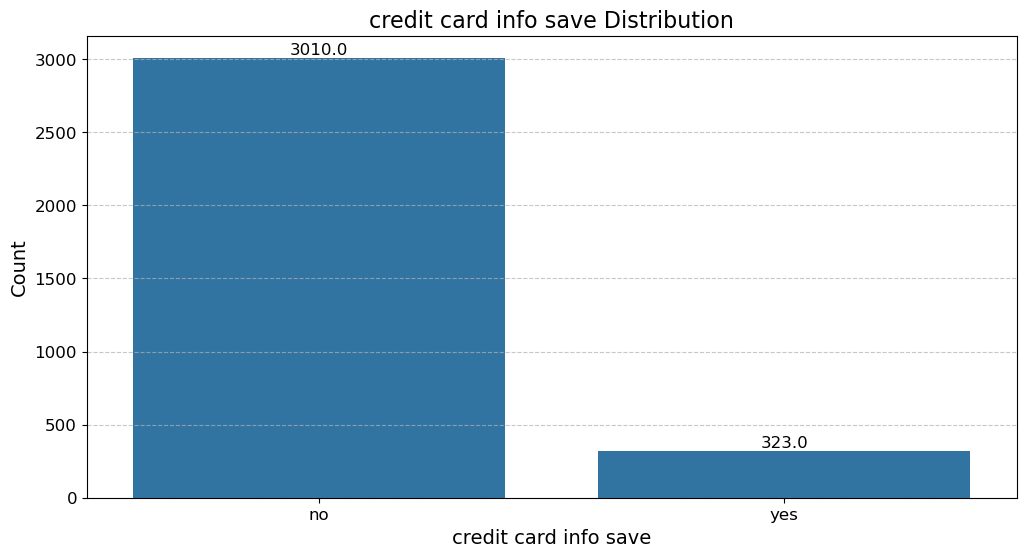

,Count,Proportion
push status,,
no,2411,0.723372
yes,922,0.276628


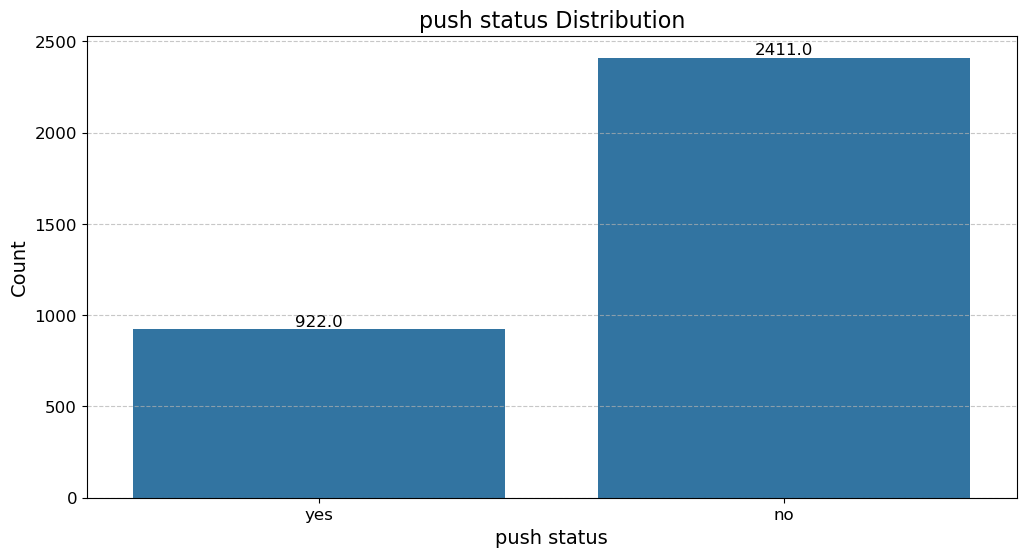

In [13]:
# 범주형 단변량 분석
eda_cat(data, 'credit card info save')
eda_cat(data, 'push status')

- 신용카드 저장 여부와 푸시 알림 활성화 여부와 연관된 컬럼을 엮어 이탈율을 확인할 만 하다

### - 이변량 분석

### 수치형
> 시각화 - kdeplot  
> 수치화 - 로지스틱 회귀

<Axes: >

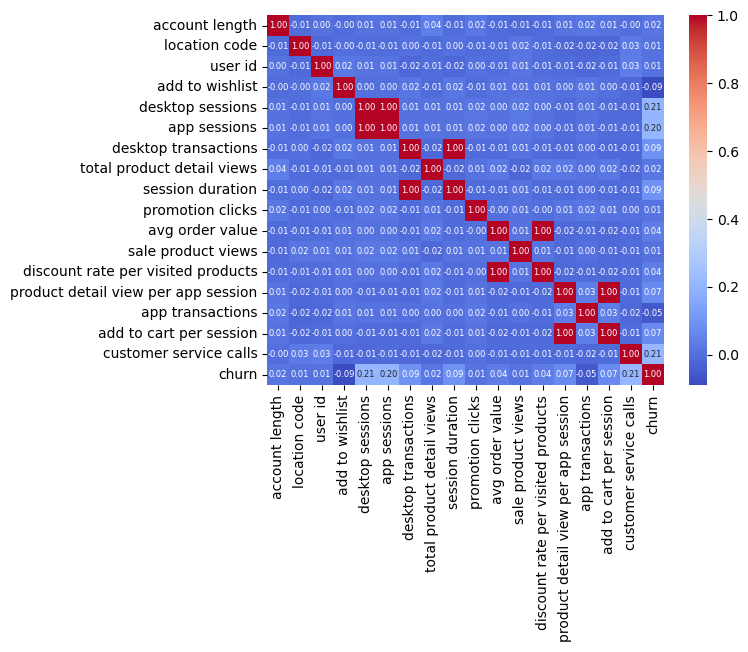

In [14]:
# 이탈율을 0,1 로 보고 선형성 파악을 위한 참고용 전체 상관 계수 확인 
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            annot_kws={"size": 6},
            )

- 이탈율과의 상관계수가 크진 않지만 top3 는  
  - 앱 세션  
  - 데스크 탑 세션  
  - cs연락 횟수

- 다중 공선성을 위배하는 독립 변수가 있다.  
  app session <-> desktop session  
  session duration <-> desktop transactions  
  discount rate per visited products <-> avg order value  
  add to cart per session <-> product detail view per app session  

  확인 요망

***

**가설 1. 세션 및 장바구니 활동이 적을수록 이탈할 것이다.**



,count,mean,std,min,25%,50%,75%,max
add to cart per session,3333.0,2.764581,0.753773,0.0,2.3,2.78,3.27,5.4


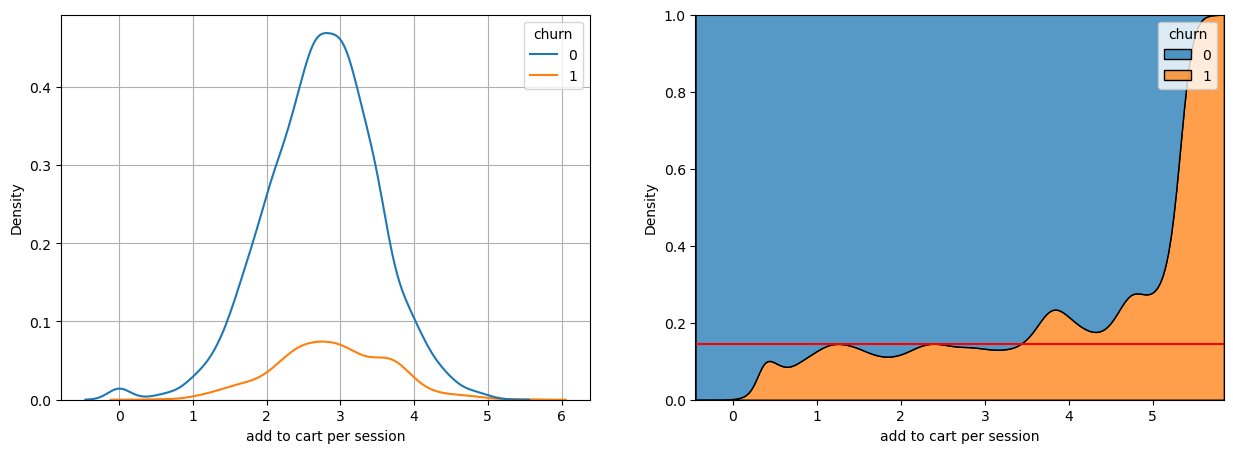

,count,mean,std,min,25%,50%,75%,max
desktop sessions,3333.0,179.811881,54.457135,0.0,144.0,179.0,216.0,351.0


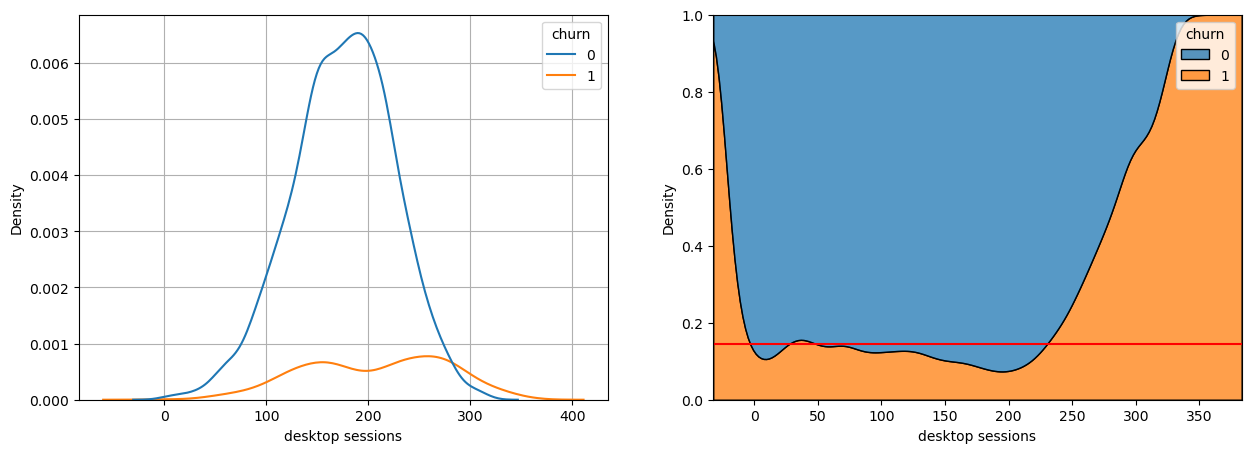

,count,mean,std,min,25%,50%,75%,max
app sessions,3333.0,30.567957,9.269376,0.0,24.0,31.0,37.0,60.0


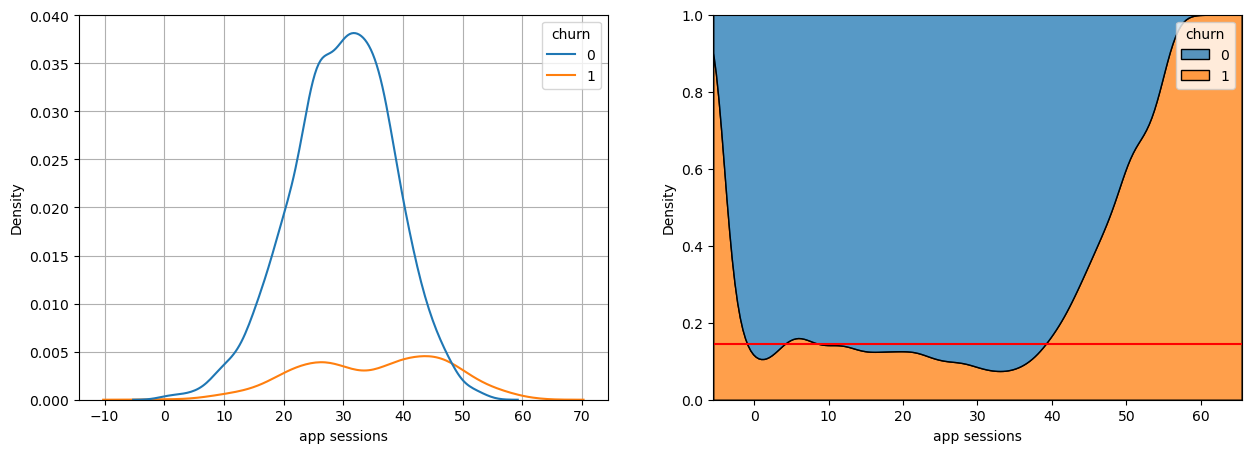

In [15]:
# kdeplot 그래프 분석
eda_int(data ,'add to cart per session','churn')
eda_int(data ,'desktop sessions','churn')
eda_int(data ,'app sessions','churn')

In [16]:
log_reg_anal(data,["add to cart per session",
                    "app sessions",
                    "desktop sessions"], "churn")

Optimization terminated successfully.
         Current function value: 0.389499
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3329
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                 0.05869
Time:                        11:17:13   Log-Likelihood:                -1298.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.157e-35
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.7510      0.288    -16.473      0.000      -5.316   

***

* 세션당 장바구니에 추가한 횟수는 이탈율과 관련이 있다

* 앱 세션과 데스크탑 세션은 이탈율과 관련이 적다
  > 앱/데스크탑 세션은 일정 수준을 넘어가면 이탈율이 급증한다  
  > 수치만 다를뿐 그래프는 거의 동일하다. 다중공선성 문제

H0 : 세션 수나 세션당 평균 장바구니 추가 횟수가 이탈율과 관련이 없다.  
H1 : 세션 수가 적거나 세션당 평균 장바구니 추가 횟수가 낮은 고객일수록 서비스 이탈 가능성이 높다.  


→ add to cart per session은 유의미하게 이탈율에 영향을 미친다고 나왔지만, 세션 수는 그렇지 않으므로 <span style="color:red">**가설 1 기각**</span>

***

**가설 2. 프로모션 클릭이 높으면 충성도가 높아 이탈률이 낮을 것이다.**

,count,mean,std,min,25%,50%,75%,max
promotion clicks,3333.0,100.110711,19.923911,0.0,87.0,100.0,114.0,170.0


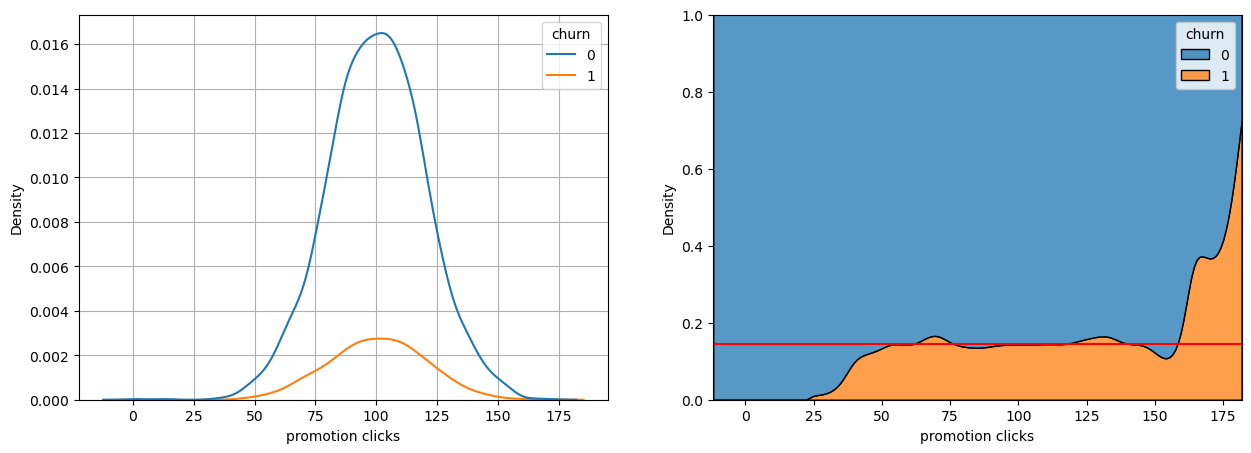

Optimization terminated successfully.
         Current function value: 0.413742
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:               0.0001047
Time:                        13:28:38   Log-Likelihood:                -1379.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                    0.5910
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9083      0.253     -7.537      0.000      -2.405      -1.412
promotion c

In [76]:
# 1. 시각적 분석: 프로모션 클릭 수에 따른 이탈 분포 확인 (KDE Plot)
# 왼쪽: 클릭 수별 이탈/유지 밀도, 오른쪽: 클릭 수 증가에 따른 이탈률 변화(비율)
eda_int(data, 'promotion clicks', hue_var='churn')

import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

# 1. 독립변수(X)와 종속변수(y) 설정
X = data[['promotion clicks']]
y = data['churn']

# 2. (선택사항) 만약 불균형이 심해 샘플링을 먼저 한다면
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)
# X = X_res
# y = y_res

# 3. 상수항 추가 (이게 올바른 사용법입니다)
X = sm.add_constant(X) 

# 4. 모델 생성 및 학습
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

H0 : 프로모션 클릭 수는 이탈률과 관련이 없다.  
H1 : 프로모션 클릭 수가 높을수록 이탈률이 낮을 것이다. (충성도 가설)

→ 분석 결과: 로지스틱 회귀 분석 결과 promotion clicks의 P-value가 0.591로 산출됨. 이는 유의수준 0.05보다 훨씬 크므로 귀무가설을 기각할 수 없음. 즉, 프로모션 클릭이 높다고 해서 이탈률이 낮아지는 경향은 통계적으로 유의미하지 않음.  
<span style="color:red">가설 2 기각</span>.

***

**가설 3. CS 연락 횟수가 많은 고객은 이탈율에 영향을 줄 것이다**

,count,mean,std,min,25%,50%,75%,max
customer service calls,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0


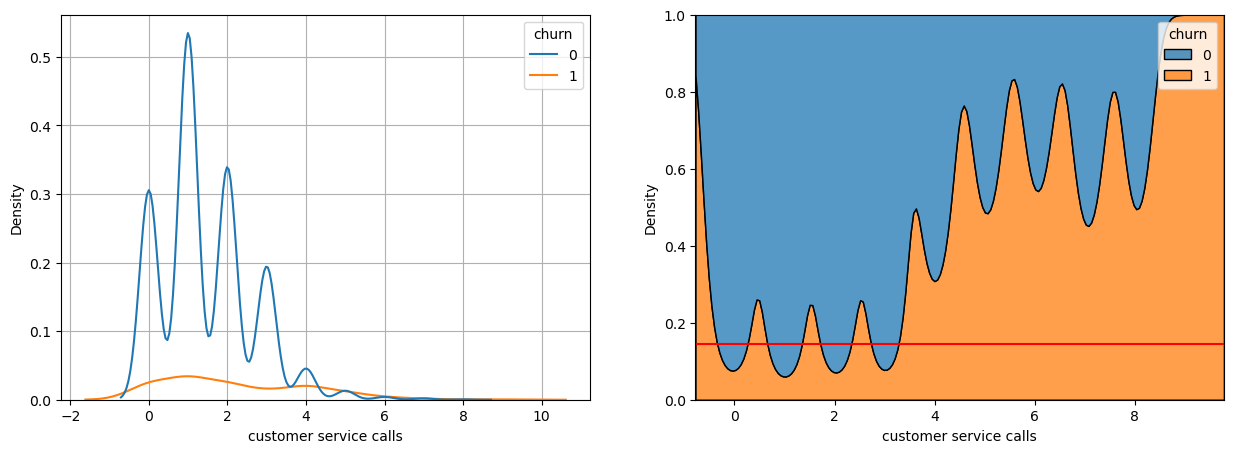

In [18]:
# kde 그래프 분석
eda_int(data ,'customer service calls','churn')

In [19]:
log_reg_anal(data,"customer service calls", "churn")

Optimization terminated successfully.
         Current function value: 0.394125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                 0.04751
Time:                        11:17:14   Log-Likelihood:                -1313.6
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 2.404e-30
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.4902      0.086    -28.849      0.000      -2.659      

In [20]:
# CS 연락이 4회 이상일 때 이탈자 비율 계산
cs_above_4 = data[data['customer service calls'] >= 4]

churn_count = cs_above_4[cs_above_4['churn'] == 1].shape[0]
total_count = cs_above_4.shape[0]
churn_rate = churn_count / total_count if total_count > 0 else 0

# 결과 출력
print(f"CS 연락 4회 이상일 때의 이탈자 비율: {churn_rate:.2%}")

CS 연락 4회 이상일 때의 이탈자 비율: 51.69%


***

* CS 연락 횟수는 이탈율과 관련이 있다
  > 0~3번은 이탈율이 평균보다 낮지만 4번 이상부터 점점 이탈율이 높아진다.

H0 : CS 연락 횟수가 많은 고객은 이탈율에 영향을 주지 않을 것이다.  
H1 : CS 연락 횟수가 많은 고객은 이탈율에 영향을 줄 것이다.


→ 유의미한 관계와 정보  <span style="color:blue">**가설3 채택**</span>

***

다른 컬럼 분석하기

,count,mean,std,min,25%,50%,75%,max
app transactions,3333.0,4.479448,2.461214,0.0,3.0,4.0,6.0,20.0


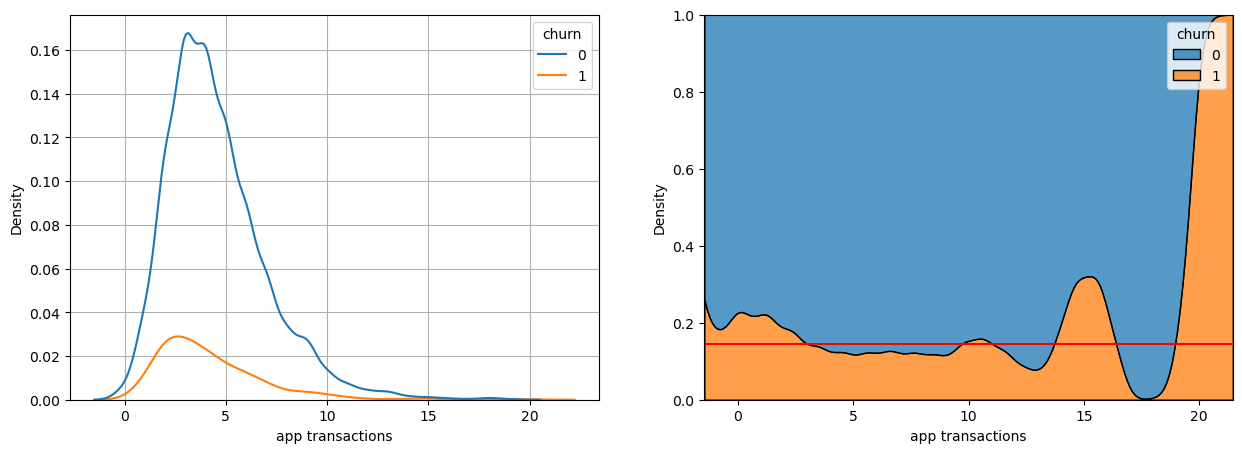

,count,mean,std,min,25%,50%,75%,max
desktop transactions,3333.0,17.087609,4.323795,0.0,14.0,17.0,20.0,31.0


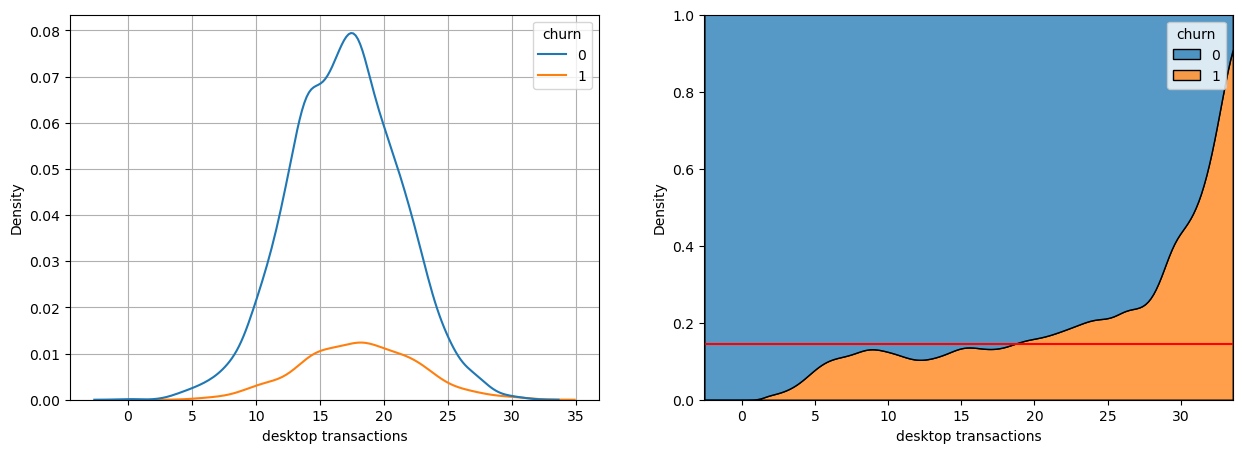

,count,mean,std,min,25%,50%,75%,max
session duration,3333.0,201.039604,50.714359,0.0,167.0,201.0,235.0,364.0


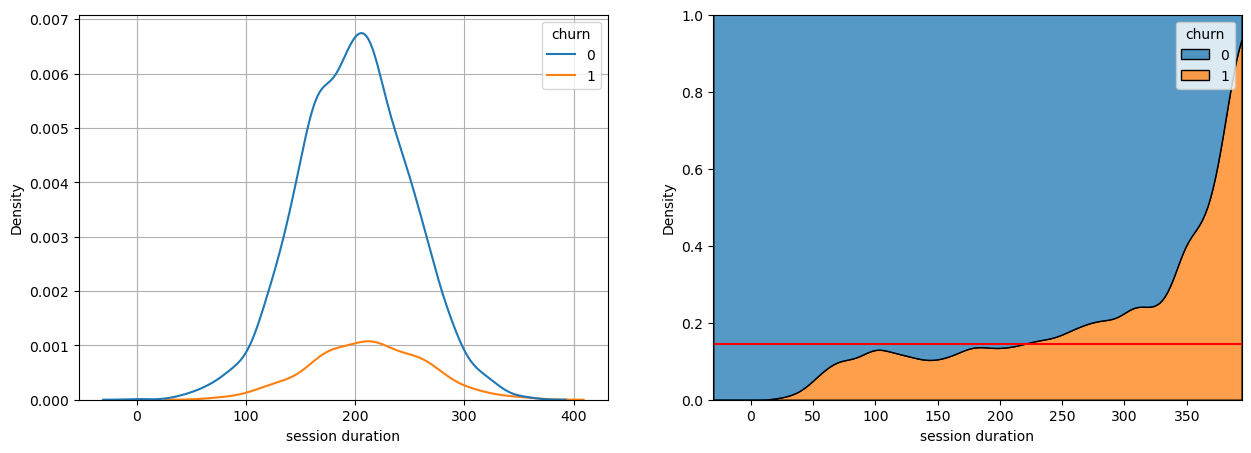

In [21]:
eda_int(data ,'app transactions','churn')
eda_int(data ,'desktop transactions','churn')
eda_int(data ,'session duration','churn')

- 대부분의 그래프가 이용을 너무 많이 했을 때 이탈율이 높은것을 볼수 있다.

,count,mean,std,min,25%,50%,75%,max
add to wishlist,3333.0,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0


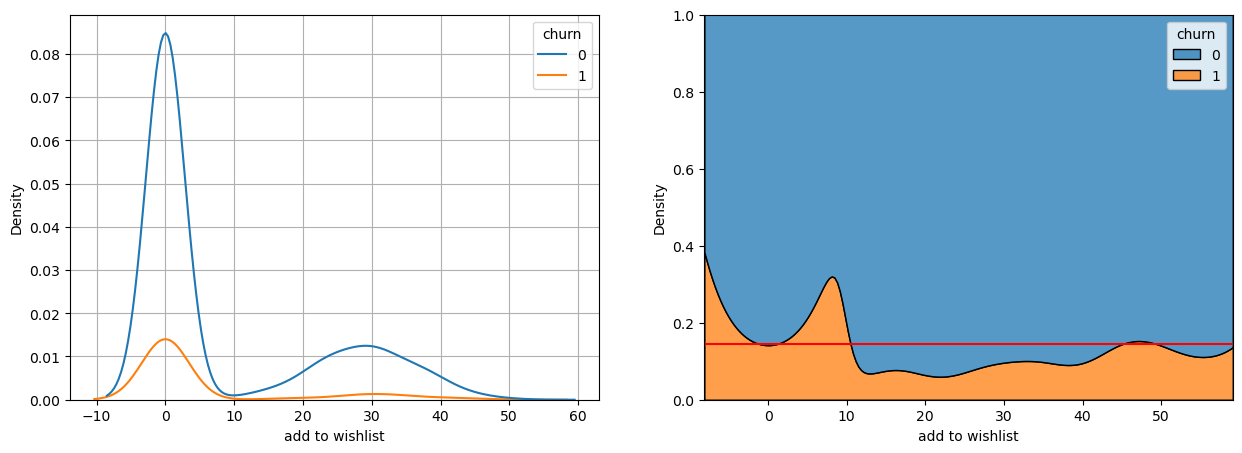

,count,mean,std,min,25%,50%,75%,max
sale product views,3333.0,100.107711,19.568609,33.0,87.0,100.0,113.0,175.0


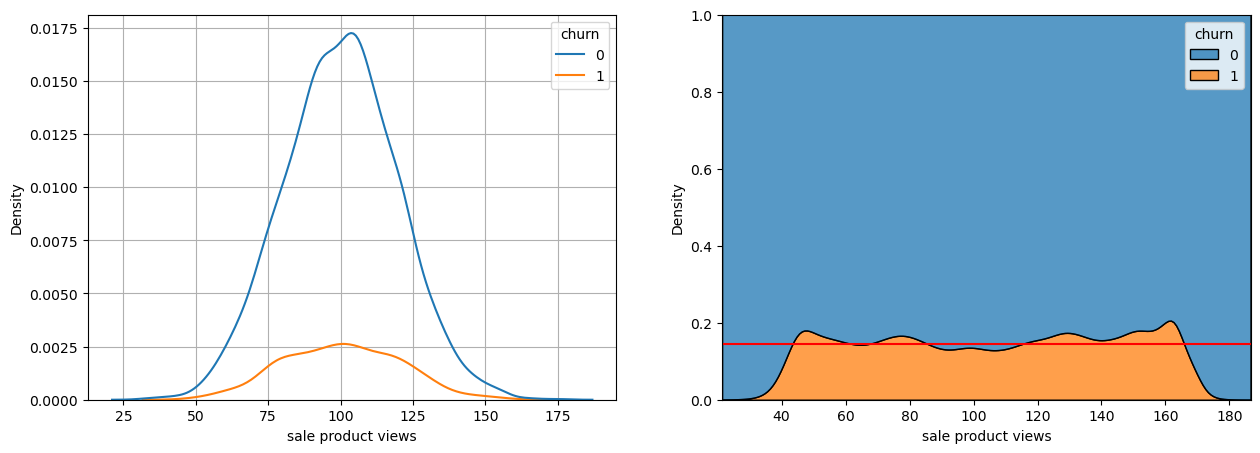

,count,mean,std,min,25%,50%,75%,max
discount rate per visited products,3333.0,9.039325,2.275873,1.04,7.52,9.05,10.59,17.77


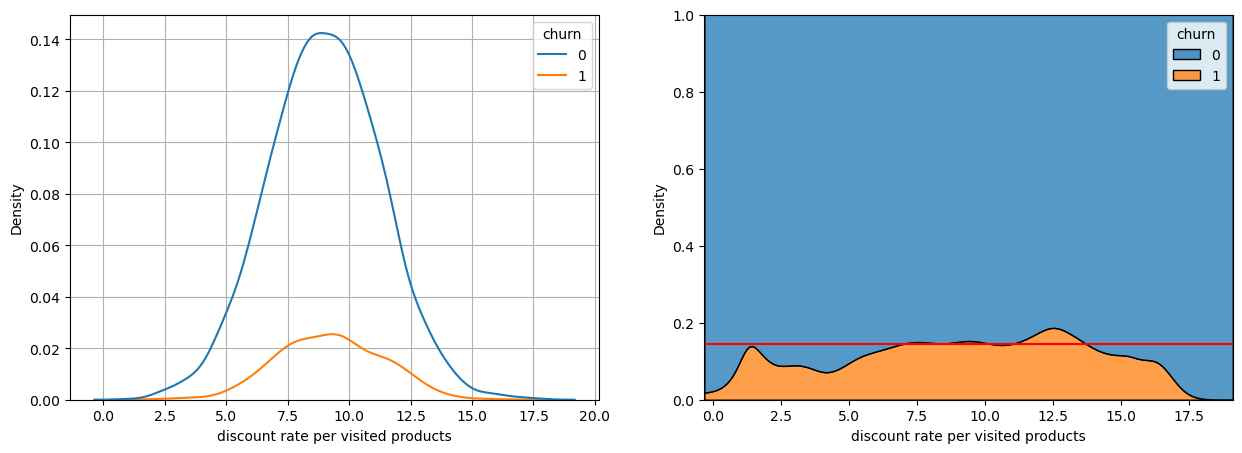

In [22]:
eda_int(data ,'add to wishlist','churn')
eda_int(data ,'sale product views','churn')
eda_int(data ,'discount rate per visited products','churn')

- 위시리스트에 항목이 0~10개까지일 때 이탈율이 평균보다 높다.
- 할인율과 관련돼서는 이탈율과 상관이 없어 보인다.

,count,mean,std,min,25%,50%,75%,max
total product detail views,3333.0,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0


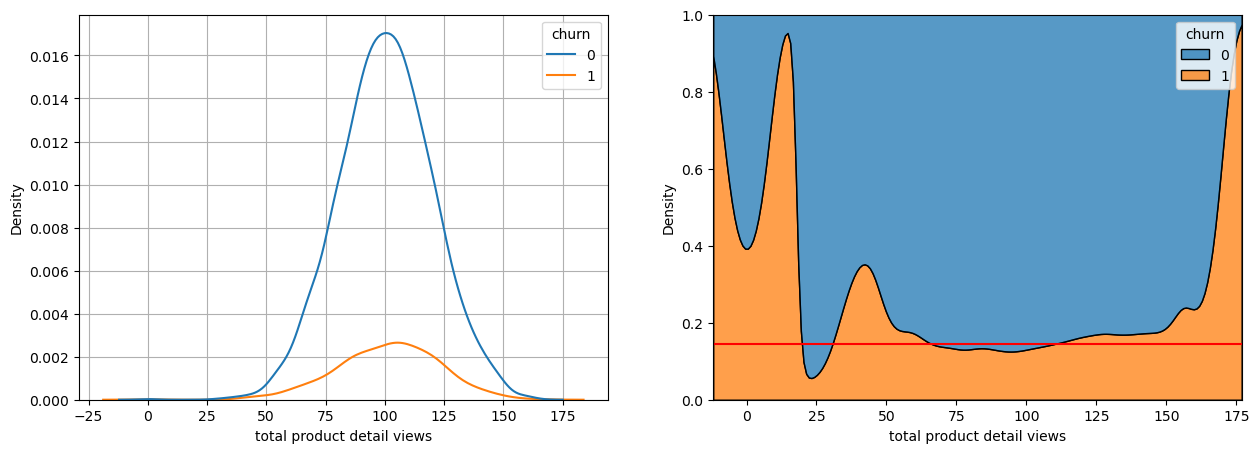

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0


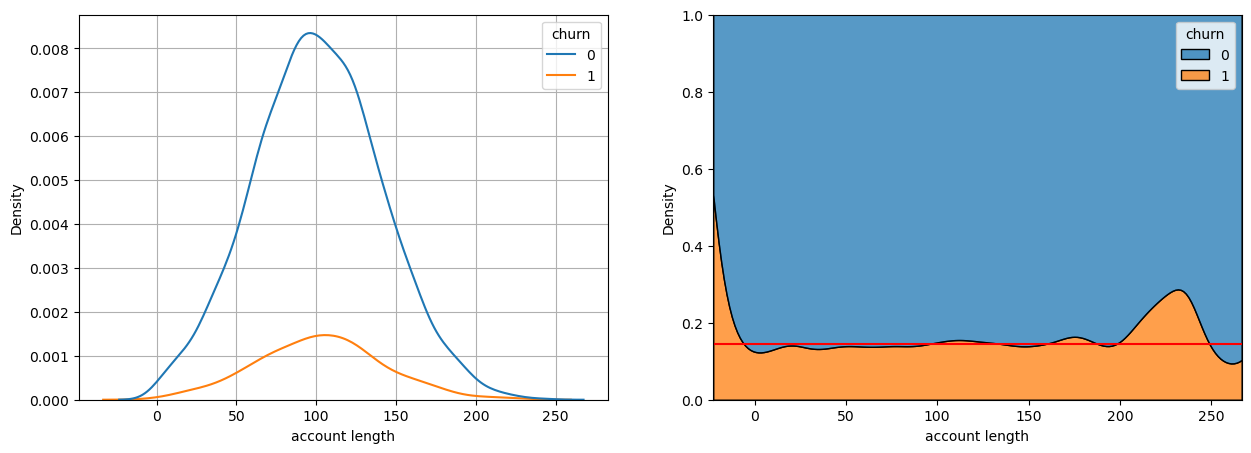

In [23]:
eda_int(data ,'total product detail views','churn')
eda_int(data ,'account length','churn')

- 총 제품 상세 조회가 0~20회까지 이탈율이 매우 높다
- 사용자 계정의 사용 기간이 200개월이 넘어야 이탈율이 평균보다 높다.

### 범주형
>시각화 - mosaic
>
>수치화 - 카이제곱 검정

In [24]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

Chi2ContingencyResult(statistic=222.5657566499376, pvalue=2.4931077033159556e-50, dof=1, expected_freq=array([[2573.80738074,  436.19261926],
       [ 276.19261926,   46.80738074]]))


(<Figure size 640x480 with 3 Axes>,
 {('no', '0'): (0.0, 0.0, 0.8985973224188091, 0.8821094689904084),
  ('no', '1'): (0.0,
   0.885431728126621,
   0.8985973224188091,
   0.1145682718733789),
  ('yes', '0'): (0.9035724467969185,
   0.0,
   0.09642755320308156,
   0.573938265636732),
  ('yes', '1'): (0.9035724467969185,
   0.5772605247729445,
   0.09642755320308156,
   0.4227394752270553)})

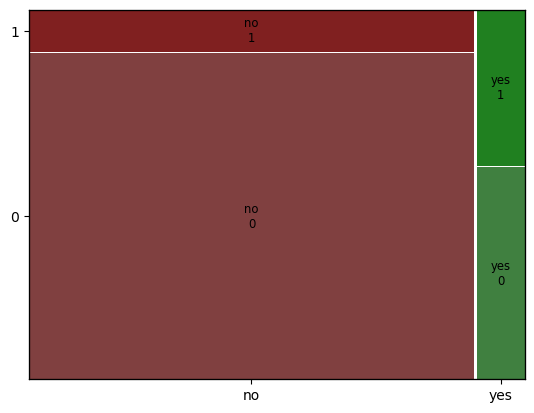

In [25]:
# 신용카드 정보 저장 여부
temp = pd.crosstab(data['credit card info save'], data['churn'])
ok = chi2_contingency(temp)
print(ok)
mosaic(data, ['credit card info save','churn'])

Chi2ContingencyResult(statistic=34.13166001075673, pvalue=5.15063965903898e-09, dof=1, expected_freq=array([[2061.61116112,  349.38883888],
       [ 788.38883888,  133.61116112]]))


(<Figure size 640x480 with 3 Axes>,
 {('yes', '0'): (0.0, 0.0, 0.2752514057375887, 0.9101981104200747),
  ('yes', '1'): (0.0,
   0.9135203695562873,
   0.2752514057375887,
   0.08647963044371258),
  ('no', '0'): (0.2802265301156982,
   0.0,
   0.7197734698843019,
   0.8300824984050125),
  ('no', '1'): (0.2802265301156982,
   0.833404757541225,
   0.7197734698843019,
   0.16659524245877488)})

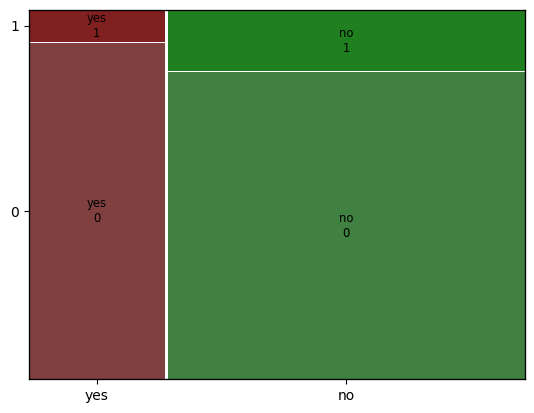

In [26]:
# 푸시 알림 활성화 여부
temp = pd.crosstab(data['push status'], data['churn'])
ok = chi2_contingency(temp)
print(ok)
mosaic(data, ['push status','churn'])

- 신용 카드 정보 저장 여부와 푸시 알림 활성화 여부 둘 모두 이탈율과 유의미한 관계가 있다.

****

보너스 궁금한 점 
1. 신용카드 정보 저장했을 때 구매 건수가 높을까?24. 푸시 알림을 활성화 했을때 프로모션 클릭 수가 높을까?

In [27]:
import scipy.stats as spst

T-statistic: -0.9445
P-value: 0.3455


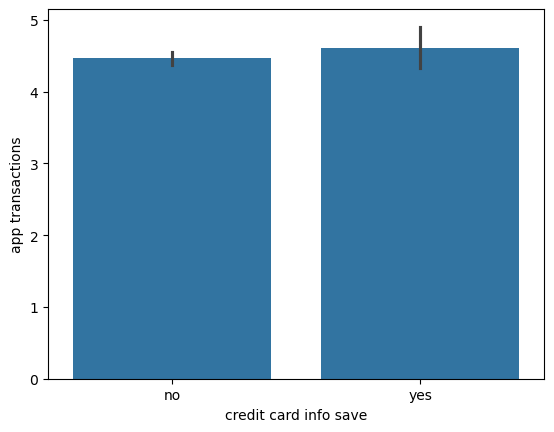

In [28]:
# 1번
sns.barplot(x='credit card info save', y='app transactions' , data= data)

A = data[data['credit card info save'] == 'yes']['app transactions']  # 정보 저장 고객
B = data[data['credit card info save'] == 'no']['app transactions']  # 정보 미저장 고객

# 독립 표본 t-검정 수행
t_stat, p_value = spst.ttest_ind(B, A, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.3903
P-value: 0.6964


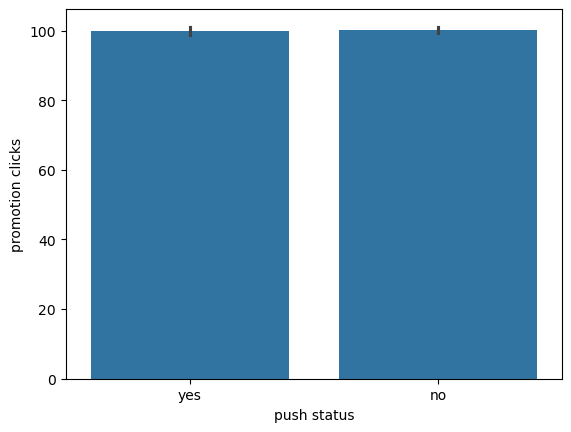

In [29]:
# 2번
sns.barplot(x='push status', y='promotion clicks' , data= data)

A = data[data['push status'] == 'yes']['promotion clicks']  # 알림 활성화 고객
B = data[data['push status'] == 'no']['promotion clicks']  # 알림 비활성화 고객

# 독립 표본 t-검정 수행
t_stat, p_value = spst.ttest_ind(B, A, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

- 관련이 없었다!

---

## RFM 모방 분석

### RFM 사용한 이유
직접 커스텀 분석하는 것 보다 E커머스 시장에서 꽤 신뢰성이 있는 RFM 분석 기법을 사용한다.  



현재 여러 컬럼이 이탈율에 큰 영향을 끼치지 않는다. 고객 세분화를 통해 등급을 나눈 후 등급별 이탈 원인을 찾아보고자 한다.(RFM에 사용할 컬럼이 없으므로 아래와 같이 대체한다)

Recency (R): 마지막 구매 후 경과 시간  
> **AccountLength (계정 사용 기간)**

Frequency (F): 일정 기간 내 구매 횟수 
> **AppTransactions + DesktopTransactions (총 구매 횟수)**

Monetary (M): 일정 기간 내 총 구매 금액 
>**AvgOrderValue * (AppTransactions + DesktopTransactions) (총 구매 금액)**

In [30]:
# RFM 값 계산
data['R'] = data['account length']
data['F'] = data['app transactions'] + data['desktop transactions']
data['M'] = data['F'] * data['avg order value']

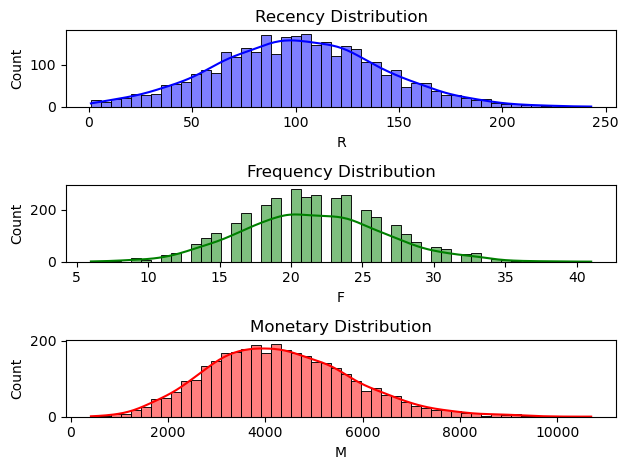

In [31]:
# 시각화
plt.subplot(3, 1, 1)
sns.histplot(data['R'], bins=50, kde=True, color='blue')
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(data['F'], bins=50, kde=True, color='green')
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(data['M'], bins=50, kde=True, color='red')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [32]:
# K-Means 클러스터링 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['R', 'F', 'M']])

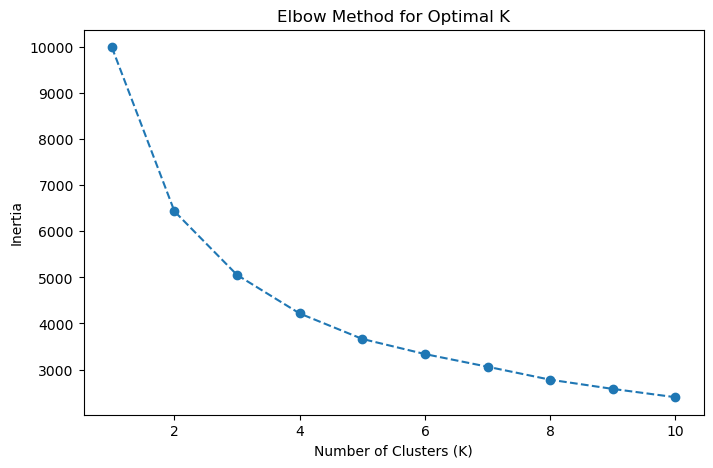

In [33]:
# 엘보 메소드 활용하여 최적 K 찾기
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [34]:
# 최적 K 선택 후 클러스터링 적용
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [35]:
# CV(변동계수) 기반 가중치 계산
cv_r = np.std(data['R']) / np.mean(data['R'])
cv_f = np.std(data['F']) / np.mean(data['F'])
cv_m = np.std(data['M']) / np.mean(data['M'])

# 전체 CV 합으로 가중치 계산
total_cv = cv_r + cv_f + cv_m
w_R = cv_r / total_cv
w_F = cv_f / total_cv
w_M = cv_m / total_cv

# 최종 가중 RFM 점수 계산
data['Weighted_RFM'] = (w_R * data['R']) + (w_F * data['F']) + (w_M * data['M'])

In [36]:
# 결과 출력
print("Calculated Weights: w_R =", round(w_R, 3), ", w_F =", round(w_F, 3), ", w_M =", round(w_M, 3))
print("===========================================================")
print(data[['user id', 'R', 'F', 'M', 'Cluster', 'Weighted_RFM']])

Calculated Weights: w_R = 0.408 , w_F = 0.239 , w_M = 0.353
      user id    R   F       M  Cluster  Weighted_RFM
0     3824657  128  20  4894.0        0   1785.714836
1     3717191  107  20  5088.0        0   1845.676822
2     3581921  137  15  2439.0        1    921.001160
3     3759999   84  12  2362.8        1    871.750449
4     3306626   75  16  2990.4        2   1090.724916
...       ...  ...  ..     ...      ...           ...
3328  4144276  192  24  6698.4        0   2450.150586
3329  3703271   68  17  3252.1        2   1180.550059
3330  3288230   28  31  5948.9        3   2120.181506
3331  3646381  184  24  3340.8        0   1260.868135
3332  4004344   74  27  6517.8        3   2338.943386

[3333 rows x 6 columns]


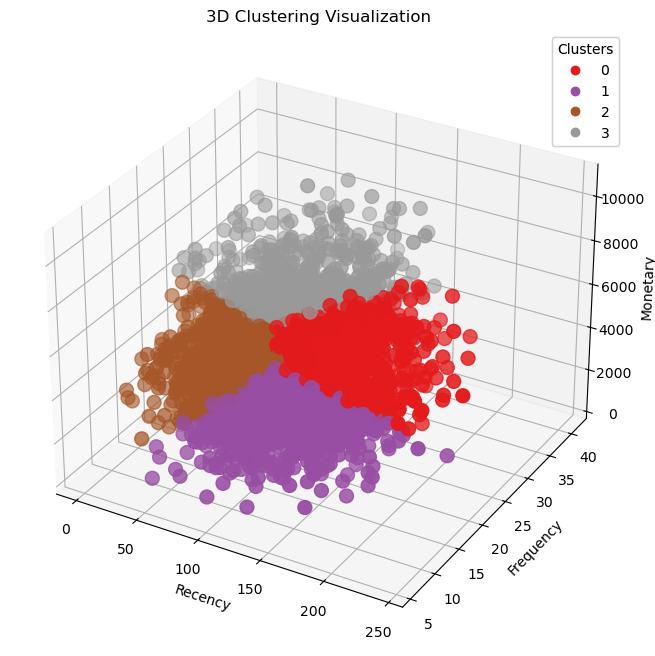

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화: 각 축에 R, F, M을 사용
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터별로 색상 지정
scatter = ax.scatter(data['R'], data['F'], data['M'], c=data['Cluster'], cmap='Set1', s=100)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Clustering Visualization')

# 범례 추가
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


**제대로 된 RFM이 아니다 보니 세분화가 잘 되지는 않았다.**

In [38]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,color,R,F,M,Cluster,Weighted_RFM
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,blue,128,20,4894.0,0,1785.714836
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,blue,107,20,5088.0,0,1845.676822
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,blue,137,15,2439.0,1,921.001160
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,blue,84,12,2362.8,1,871.750449
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,blue,75,16,2990.4,2,1090.724916


In [39]:
data = data.drop(columns=['color','Weighted_RFM'])

In [40]:
# 이탈자 데이터 필터링
churn_data = data[data['churn'] == 1]

# 클러스터별 이탈자 비율 계산
cluster_churn_rate = churn_data.groupby('Cluster').size() / data.groupby('Cluster').size()

# 각 클러스터의 TOP3 특성 (상위 3개 특징 분석)
top_features = {}
columns_to_analyze = data.columns.tolist()

for cluster in range(optimal_k):
    cluster_data = churn_data[churn_data['Cluster'] == cluster]
    
    # 각 클러스터의 이탈자 비율
    churn_count = cluster_data.shape[0]
    total_count = data[data['Cluster'] == cluster].shape[0]
    churn_rate = churn_count / total_count
    
    # 각 클러스터의 특성 분석 (상관분석이나 중요 변수 기반으로 TOP3 추출)
    correlation = cluster_data[columns_to_analyze].corr(numeric_only=True)    
    
    # 이탈자들과 관련된 변수들의 상관계수 또는 중요 특성 추출
    top_features[cluster] = correlation.abs().nlargest(3, 'R')['R'].index.tolist()  # 예시로 'R' 변수에 대한 상관성으로 TOP3 추출
    
    print(f"{cluster}등급: {total_count}명 중 {churn_count}명이 이탈, 이탈 비율: {churn_rate:.2%}")
    print(f"{cluster}등급 이탈자의 TOP3 특징: {top_features[cluster]}")
    


0등급: 884명 중 131명이 이탈, 이탈 비율: 14.82%
0등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']
1등급: 782명 중 108명이 이탈, 이탈 비율: 13.81%
1등급 이탈자의 TOP3 특징: ['account length', 'R', 'customer service calls']
2등급: 1000명 중 130명이 이탈, 이탈 비율: 13.00%
2등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']
3등급: 667명 중 114명이 이탈, 이탈 비율: 17.09%
3등급 이탈자의 TOP3 특징: ['account length', 'R', 'F']


---

이탈자의 대부분의 계정 기간이 중요하다 확인해보자.

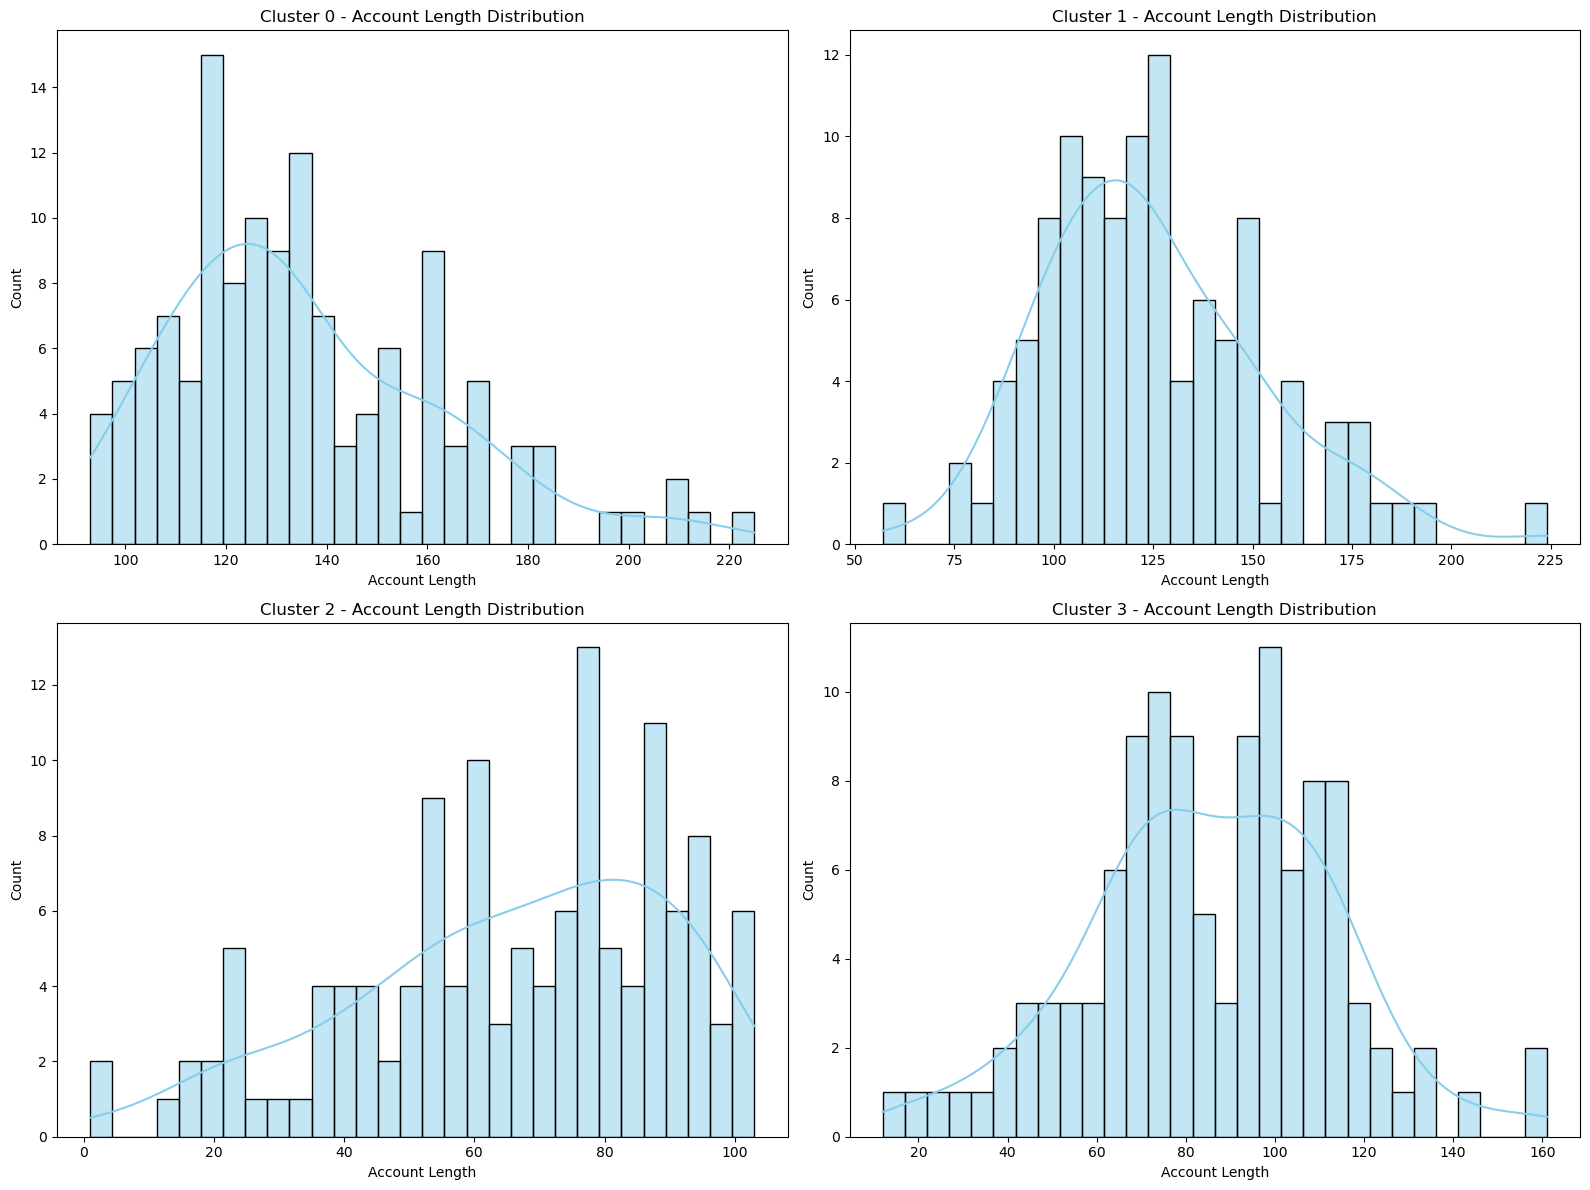

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

for cluster in range(optimal_k):

    cluster_churn_data = churn_data[churn_data['Cluster'] == cluster]
    
    plt.subplot(2, 2, cluster+1)
    sns.histplot(cluster_churn_data['account length'], kde=True, color='skyblue', bins=30)
    plt.title(f'Cluster {cluster} - Account Length Distribution')
    plt.xlabel('Account Length')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

0등급 : 100개월 이상에서 가장 큰 이탈율을 보임  
1등급 : 50개월 이상부터 전체적으로 고루 분포, 또 CS관리를 잘해야 함   
2등급 : 보통 0~100개월에 이탈자 분포  
3등급 : 전체적으로 고루 분포 되어있으며 정규분포를 따름  

In [42]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,R,F,M,Cluster
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,128,20,4894.0,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,107,20,5088.0,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,137,15,2439.0,1
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,84,12,2362.8,1
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,75,16,2990.4,2


In [43]:
data.to_csv("hi.csv",index=False)

---

# 분석 정리

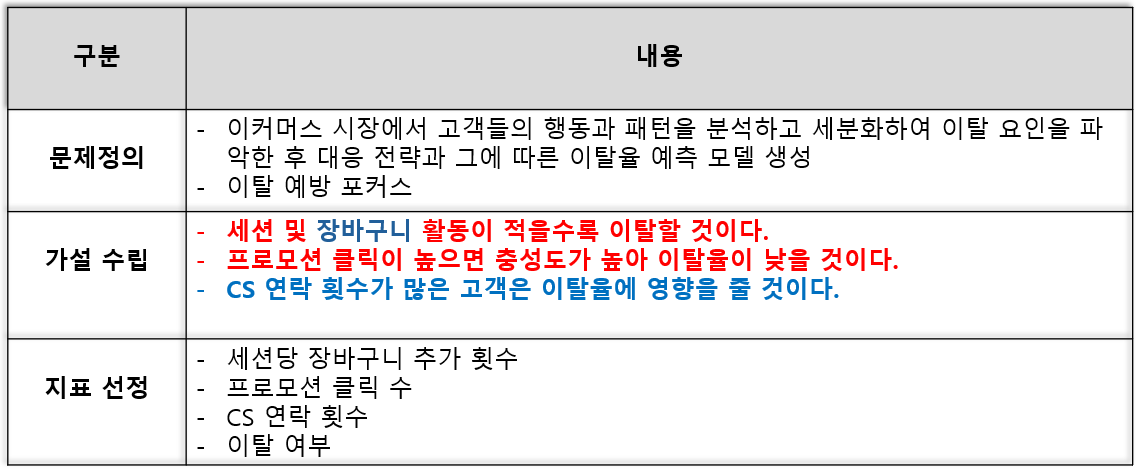
* 빨간색 > 가설 기각
* 파란색 > 가설 채택

## 제안

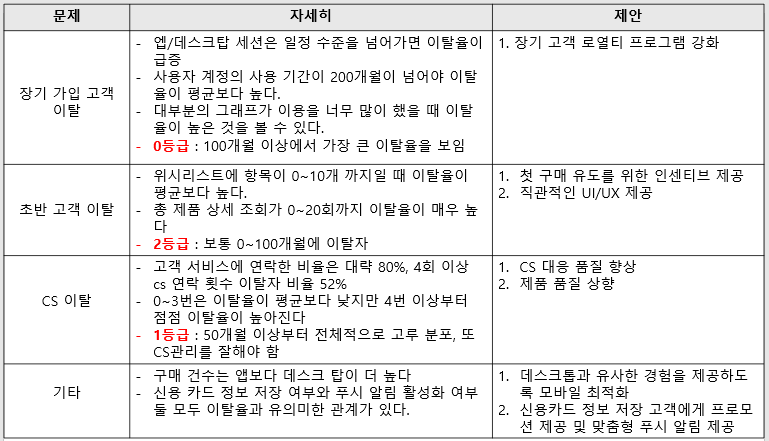

* 제한된 정보(컬럼)으로 인해 제안이 구체적이지는 못하다.

# +이탈 예측 모델 만들기

## 모델 정리

이탈 예측과 해석에 직·간접적으로 영향이 적거나, 다중공선성/데이터 누수를 일으킬 수 있는 변수는 제거하고,  
행동 기반 핵심 Feature만 유지하여 모델 안정성과 현실적 예측력을 확보함.  
[제거 변수 목록들]  UserID → 고객 식별자, 예측/모델링에 의미 없음  
AccountLength → 장기간 가입 고객일수록 자연적 유지, 이탈 예측에 오히려 leakage 가능  
R, F, M → RFM은 모델링용 Feature로 사용하지 않고, EDA/세그멘테이션용으로만 활용  
DesktopTransactions, AppTransactions → 최종 Feature로 유지할 필요 없이, 이미 AddToCartPerSession 등 핵심 행동 지표로 대체 가능  
TotalProductDetailViews → 행동 지표 중 상관성이 높아 핵심 Feature로 대체 가능  
SessionDuration → 이탈과 상관 낮음ration

변수 제거 후  

s_data >> 변수 제거 후 SMOTE 샘플링  
o_data >> 변수 제거 후 OVER 샘플링  


data_1  >> S/O 샘플링 기본 베이스 컬럼  
data_2  >> S/O 샘플링 변수 중요도 상위 컬럼 지정  
data_3  >> S/O 샘플링 PCA 기법  

모델링  
로지스틱 회귀 - 기본적인 모델 채택  
XG 부스트 - 그래디언트 부스팅 알고리즘 채택  
캣 부스트 - 그라디언트 부스팅 중 좋은 성능  
랜덤 포레스트 - 앙상블 알고리즘 채택  

## 결과 영향 변수 제거


In [44]:
data.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,R,F,M,Cluster
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0,128,20,4894.0,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0,107,20,5088.0,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0,137,15,2439.0,1
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0,84,12,2362.8,1
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0,75,16,2990.4,2


In [45]:
# 제거 대상 컬럼 리스트
drop_cols = [
    'user id',                     # 고객 식별자
    'account length',              # 가입 기간 → leakage 가능
    'R', 'F', 'M',                 # RFM 분석용 (모델링에서는 제외)
    'desktop transactions',        # 앱/데스크톱 거래 수 → AppTransactions 포함
    'app transactions',            # 중복
    'total product detail views',  # 상세 조회 총합 → product detail view per app session 사용
    'session duration',            # 이탈과 관계 적음
    'location code',               # 지역 코드 → 의미 없음
    'avg order value',             # 이탈과 상관 적음
    'discount rate per visited products', # 이탈과 상관 적음
    'desktop sessions',            # 총 세션으로 합칠 예정
    'app sessions',                # 총 세션으로 합칠 예정
    'Cluster'                      # RFM 클러스터용, 모델에는 필요 없음
]

# 데이터에서 컬럼 제거
modeling_data = data.drop(columns=drop_cols)

In [69]:
modeling_data.head(5)

,credit card info save,push status,add to wishlist,promotion clicks,sale product views,product detail view per app session,add to cart per session,customer service calls,churn
0,0,1,25,87,91,10.0,2.70,1,0
1,0,1,26,103,103,13.7,3.70,1,0
2,0,0,0,110,104,12.2,3.29,0,0
3,1,0,0,88,89,6.6,1.78,2,0
4,1,0,0,122,121,10.1,2.73,3,0


In [70]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   credit card info save                3333 non-null   int64  
 1   push status                          3333 non-null   int64  
 2   add to wishlist                      3333 non-null   int64  
 3   promotion clicks                     3333 non-null   int64  
 4   sale product views                   3333 non-null   int64  
 5   product detail view per app session  3333 non-null   float64
 6   add to cart per session              3333 non-null   float64
 7   customer service calls               3333 non-null   int64  
 8   churn                                3333 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 234.5 KB


## s_data, o_data 각각 성능 구하기

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. 데이터 전처리 (공통)
modeling_data = data.drop(columns=drop_cols).copy()
modeling_data = modeling_data.replace({'yes': 1, 'no': 0}).fillna(0)

X = modeling_data.drop(columns=['churn'])
y = modeling_data['churn']

# [중요] 샘플링 전 데이터 분리 (진실의 방 격리)
X_train_raw, X_test_raw, y_train_raw, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. 샘플링 방식 정의
samplers = {
    'S (SMOTE)': SMOTE(random_state=42),
    'O (Over)': RandomOverSampler(random_state=42)
}

# 3. 모델 정의
models = {
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'XGB': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CB': CatBoostClassifier(random_state=42, verbose=0),
    'RF': RandomForestClassifier(random_state=42)
}

# 4. 루프 실행 (샘플링 x 특징추출 방식 x 모델)
results = []

for s_name, sampler in samplers.items():
    # 학습 데이터에만 샘플링 적용
    X_train_res, y_train_res = sampler.fit_resample(X_train_raw, y_train_raw)
    
    # --- [방식 1: Base] 전체 변수 사용 ---
    # (이미 X_train_res가 전체 변수 상태임)
    
    # --- [방식 2: Top5] XGB 기반 중요도 추출 ---
    # XGB로 중요 변수 5개 선정 (학습 데이터 기준)
    temp_xgb = XGBClassifier(random_state=42).fit(X_train_res, y_train_res)
    top_5_cols = pd.Series(temp_xgb.feature_importances_, index=X.columns).nlargest(5).index.tolist()
    
    # --- [방식 3: PCA] 차원 축소 (3개 성분) ---
    pca = PCA(n_components=3, random_state=42)
    X_train_pca = pca.fit_transform(X_train_res)
    X_test_pca = pca.transform(X_test_raw)
    
    # 평가를 위한 데이터셋 맵핑
    sub_datasets = {
        'Base': (X_train_res, X_test_raw),
        'Top5': (X_train_res[top_5_cols], X_test_raw[top_5_cols]),
        'PCA': (X_train_pca, X_test_pca)
    }

    for d_name, (X_tr, X_te) in sub_datasets.items():
        for m_name, model in models.items():
            # 모델 학습
            model.fit(X_tr, y_train_res)
            
            # 예측 (임계값 0.3 적용하여 현실적인 Recall 확보)
            y_probs = model.predict_proba(X_te)[:, 1]
            y_pred = (y_probs >= 0.3).astype(int)
            
            # 결과 저장
            results.append({
                'Dataset': f"{s_name}_{d_name}",
                'Model': m_name,
                'Recall': round(recall_score(y_test, y_pred), 4),
                'F1-Score': round(f1_score(y_test, y_pred), 4)
            })

# 5. 최종 결과 정리
final_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print("=== [현실판] 데이터셋 및 모델별 최종 성능 비교 ===")
display(final_df)

C:\Users\whgus\AppData\Local\Temp\ipykernel_7288\3280374147.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  modeling_data = modeling_data.replace({'yes': 1, 'no': 0}).fillna(0)


=== [현실판] 데이터셋 및 모델별 최종 성능 비교 ===


,Dataset,Model,Recall,F1-Score
20,O (Over)_PCA,LR,1.0000,0.2597
8,S (SMOTE)_PCA,LR,1.0000,0.2597
4,S (SMOTE)_Top5,LR,0.9794,0.2883
0,S (SMOTE)_Base,LR,0.9691,0.2875
12,O (Over)_Base,LR,0.9175,0.3090
16,O (Over)_Top5,LR,0.8763,0.3025
18,O (Over)_Top5,CB,0.7835,0.3248
6,S (SMOTE)_Top5,CB,0.7629,0.3058
10,S (SMOTE)_PCA,CB,0.7526,0.2575
2,S (SMOTE)_Base,CB,0.7216,0.2947


# 모델 예측 결과

로지스틱 회귀 모델은 높은 재현율을 보였으나 과잉 탐지로 인해 실제 비즈니스 적용에 한계가 있었다. 반면, CatBoost 모델은 주요 변수 5개를 활용했을 때 재현율 0.78, F1-Score 0.32라는 가장 균형 잡힌 성능을 보였다. 이는 이탈 고객의 78%를 포착하면서도 불필요한 마케팅 자원 낭비를 최소화할 수 있는 수치다.

## 최고 성능  
xgb 변수 중요도 + OVER or SMOTE 샘플링 + catboost

	Dataset	Model	Recall	F1-Score
O (Over)_Top5	CB	0.7835	0.3248  
S (SMOTE)_Top5	CB	0.7629	0.3058

이탈 요인 중요도 순위

C:\Users\whgus\AppData\Local\Temp\ipykernel_7288\1806609887.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


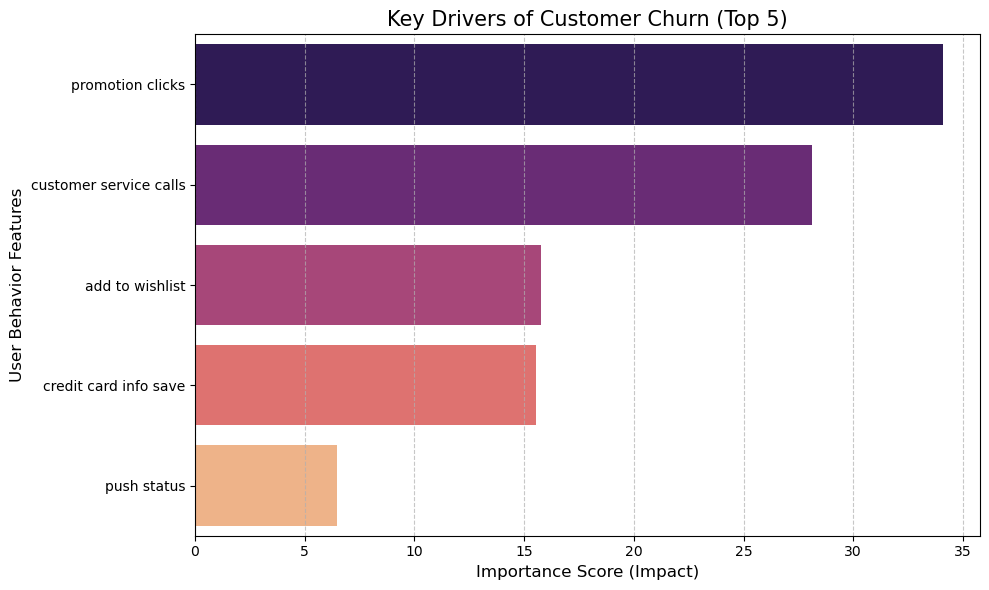

=== [최종 확인] 이탈 결정 요인 TOP 5 ===
1위: promotion clicks (중요도: 34.07)
2위: customer service calls (중요도: 28.13)
3위: add to wishlist (중요도: 15.79)
4위: credit card info save (중요도: 15.54)
5위: push status (중요도: 6.46)


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier

# 1. 최적 조합(Over + Top5 + CatBoost)으로 재학습
best_model = CatBoostClassifier(random_state=42, verbose=0)
X_train_final, y_train_final = RandomOverSampler(random_state=42).fit_resample(X_train_raw[top_5_cols], y_train_raw)
best_model.fit(X_train_final, y_train_final)

# 2. 변수 중요도 추출 및 정렬
feature_importance = best_model.get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': top_5_cols,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 3. 시각화 (PPT용)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Key Drivers of Customer Churn (Top 5)', fontsize=15)
plt.xlabel('Importance Score (Impact)', fontsize=12)
plt.ylabel('User Behavior Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. 최종 텍스트 결과 출력 (순위 교정)
print("=== [최종 확인] 이탈 결정 요인 TOP 5 ===")
for i, (idx, row) in enumerate(importance_df.iterrows(), start=1):
    print(f"{i}위: {row['Feature']} (중요도: {row['Importance']:.2f})")